In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from mmdew.bucket_stream2 import BucketStream
import tqdm
from data import MNIST

2023-09-17 23:32:33.750664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 23:32:34.216447: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-17 23:32:34.216471: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-17 23:32:35.495477: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
sample_size = 1000000
dataset = MNIST()
next_sample, _, is_change = dataset.next_sample()
# Assuming you've already defined the BucketStream class.



In [8]:
bs = BucketStream(1, 1e-22)  
times = []
for i in tqdm.tqdm(range(10000)):
    start_time = time.time()
    bs.insert_no_cut(next_sample)
    end_time = time.time()
    times.append(end_time - start_time)

100%|██████████| 30000/30000 [00:13<00:00, 2211.93it/s]


In [11]:
str(bs.buckets[0])

'Elems:\t[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n ...\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]]\nWeights:\t[[0.00781465]\n [0.00781289]\n [0.00781313]\n [0.00781235]\n [0.00781287]\n [0.00781214]\n [0.00781325]\n [0.00781182]\n [0.00781287]\n [0.00781237]\n [0.00781261]\n [0.00781266]\n [0.00781253]\n [0.00781276]\n [0.00781284]\n [0.00781249]\n [0.00781254]\n [0.00781233]\n [0.00781244]\n [0.00781264]\n [0.00781253]\n [0.00781262]\n [0.00781229]\n [0.00781242]\n [0.00781233]\n [0.00781254]\n [0.00781238]\n [0.00781248]\n [0.00781245]\n [0.00781252]\n [0.00781251]\n [0.00781257]\n [0.0078126 ]\n [0.00781253]\n [0.00781245]\n [0.00781246]\n [0.00781249]\n [0.00781254]\n [0.00781258]\n [0.00781239]\n [0.00781243]\n [0.00781246]\n [0.00781242]\n [0.00781237]\n [0.00781255]\n [0.00781247]\n [0.0078125 ]\n [0.00781244]\n [0.00781249]\n [0.0078126 ]\n [0.00781254]\n [0.00781255]\n [0.00781264]\n [0.00781261]\n [0.00781246]\n [0.00781248]\n [0.00781238]\

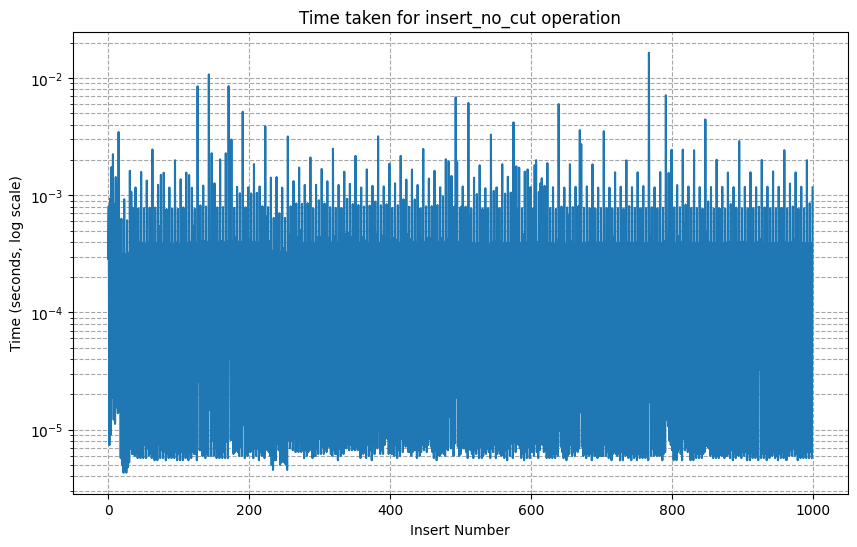

In [7]:
# Plot the results on a logarithmic y-axis.
plt.figure(figsize=(10, 6))
plt.plot(times)
plt.yscale('log')
plt.title('Time taken for insert_no_cut operation')
plt.xlabel('Insert Number')
plt.ylabel('Time (seconds, log scale)')
plt.grid(True, which="both", ls="--", c='0.65')
plt.show()